# **Problem Statement**

The Customer Churn dataset contains anonymous information such as area, calling plan, Voice mail details, Day/Nigh calling minutes, etc. for a telecom company.                  

The goal is to train a binary classifier to predict if the customer will churn or not. 


### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
train = pd.read_csv('Train Set.csv')
test  = pd.read_excel('Test Set.xlsx')

### Exploratory Data Analysis

In [3]:
train.head()   ##Looking at top 5 records in train dataset

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,...,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1,False.
1,OH,107,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,...,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1,False.
2,NJ,137,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,...,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0,False.
3,OH,84,408.0,375-9999,yes,no,0.0,299.4,71.0,50.90,...,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2,False.
4,OK,75,415.0,330-6626,yes,no,0.0,166.7,113.0,28.34,...,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3,False.


Checking the feature names in our train dataset.

In [4]:
train.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

Similarly checking for the test dataset.

In [5]:
test.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,WV,101,415,367-9127,no,yes,28,220.3,96,37.45,285.8,72,24.29,203.0,111,9.14,9.4,6,2.54,4
1,NV,129,415,420-3028,no,no,0,150.0,98,25.50,232.4,101,19.75,261.2,123,11.75,12.5,6,3.38,1
2,MA,67,415,357-6348,no,yes,34,161.7,114,27.49,207.6,115,17.65,205.7,114,9.26,9.2,4,2.48,0
3,MI,37,415,386-1131,no,no,0,191.4,116,32.54,167.4,99,14.23,216.5,112,9.74,14.0,5,3.78,3
4,KY,64,415,349-8391,yes,no,0,146.7,83,24.94,148.3,91,12.61,238.6,69,10.74,12.5,3,3.38,3


Checking the feature names in our test dataset.

In [6]:
test.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')

We have similar features in the test dataset as the train dataset except the 'Churn?'. We will predict the 'Churn?' using the model built using the train data.

In [7]:
#Print data types for each variable in train dataset
train.dtypes

State              object
Account Length      int64
Area Code         float64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message     float64
Day Mins          float64
Day Calls         float64
Day Charge        float64
Eve Mins          float64
Eve Calls         float64
Eve Charge        float64
Night Mins        float64
Night Calls       float64
Night Charge      float64
Intl Mins         float64
Intl Calls        float64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

We can see that there are three format of data types:-

- **Object :-**              
Object format means variables are categorical. Categorical variables in our dataset are: State, Phone, Int'l Plan, VMail Plan, Churn?.   

- **int64 :-**          
It represents the integer variables. Account Length, CustServ Calls are of this format.     

- **float64 :-**            
It represents the variable which have some decimal values involved. They are: Area code, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, Intl Mins, Intl Calls, Intl Charge.

Lets look at the shape of the dataset.

In [8]:
train.shape, test.shape

((3027, 21), (306, 20))

We have 3027 rows and 21 columns in the train dataset and 306 rows and 20 columns in test dataset.

In [9]:
train.info() ##Getting some info regarding the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3027 non-null   object 
 1   Account Length  3027 non-null   int64  
 2   Area Code       3026 non-null   float64
 3   Phone           3027 non-null   object 
 4   Int'l Plan      3027 non-null   object 
 5   VMail Plan      3027 non-null   object 
 6   VMail Message   3024 non-null   float64
 7   Day Mins        3024 non-null   float64
 8   Day Calls       3026 non-null   float64
 9   Day Charge      3025 non-null   float64
 10  Eve Mins        3025 non-null   float64
 11  Eve Calls       3021 non-null   float64
 12  Eve Charge      3021 non-null   float64
 13  Night Mins      3024 non-null   float64
 14  Night Calls     3025 non-null   float64
 15  Night Charge    3023 non-null   float64
 16  Intl Mins       3023 non-null   float64
 17  Intl Calls      3026 non-null   f

In [10]:
train.describe()  #Statistical Analysis of the train dataset

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3027.000000,3026.000000,3024.000000,3024.000000,3026.000000,3025.000000,3025.000000,3021.000000,3021.000000,3024.000000,3025.000000,3023.000000,3023.00000,3026.000000,3025.000000,3027.000000
mean,101.025768,437.137806,8.088955,179.852910,100.379048,30.574145,200.993752,99.961602,17.092082,200.764418,99.981157,9.037539,10.23265,4.469597,2.763980,1.553023
std,39.888145,42.337399,13.670150,54.612369,20.120581,9.283645,50.978077,19.883015,4.334110,50.628208,19.577734,2.277114,2.78757,2.445282,0.752509,1.311427
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.00000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,144.000000,87.000000,24.480000,166.600000,87.000000,14.160000,167.100000,87.000000,7.520000,8.50000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.130000,201.200000,100.000000,9.060000,10.30000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.225000,114.000000,36.750000,235.800000,113.000000,20.050000,235.300000,113.000000,10.590000,12.10000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,395.000000,175.000000,17.770000,20.00000,19.000000,5.400000,9.000000


Lets check the missing values present in the dataset.

In [11]:
#Checking the missing values
train.isnull().sum()

State             0
Account Length    0
Area Code         1
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     3
Day Mins          3
Day Calls         1
Day Charge        2
Eve Mins          2
Eve Calls         6
Eve Charge        6
Night Mins        3
Night Calls       2
Night Charge      4
Intl Mins         4
Intl Calls        1
Intl Charge       2
CustServ Calls    0
Churn?            0
dtype: int64

Very few values in the dataset have null values, we can either drop it directly or replace it with the mean, median or mode.

**Univariate Analysis**

**Target Variable**

We will first look at the target variable i.e **Churn?** . As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [12]:
train['Churn?'].value_counts()

False.    2588
True.      439
Name: Churn?, dtype: int64

In [13]:
#Normalize can be set to True to print proportions instead of number
train['Churn?'].value_counts(normalize=True)

False.    0.854972
True.     0.145028
Name: Churn?, dtype: float64

<AxesSubplot:>

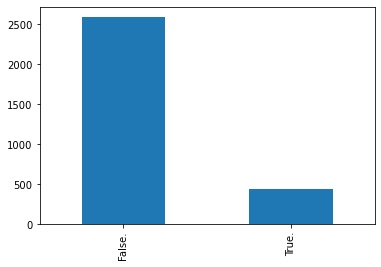

In [14]:
train['Churn?'].value_counts().plot.bar()

We can observe that 2588(85%) people continue with the services while 439(14.5%) people churn out.

Now lets visulaize each variable separately. 

**Categorical features** :-  These features have categories (State, Area Code, Int'l Plan, VMail Plan, )

**Numerical features** :-   These features have numerical values(Account Length, VMail Message)

Lets visualize the categorical features first.

**Categorical Features**

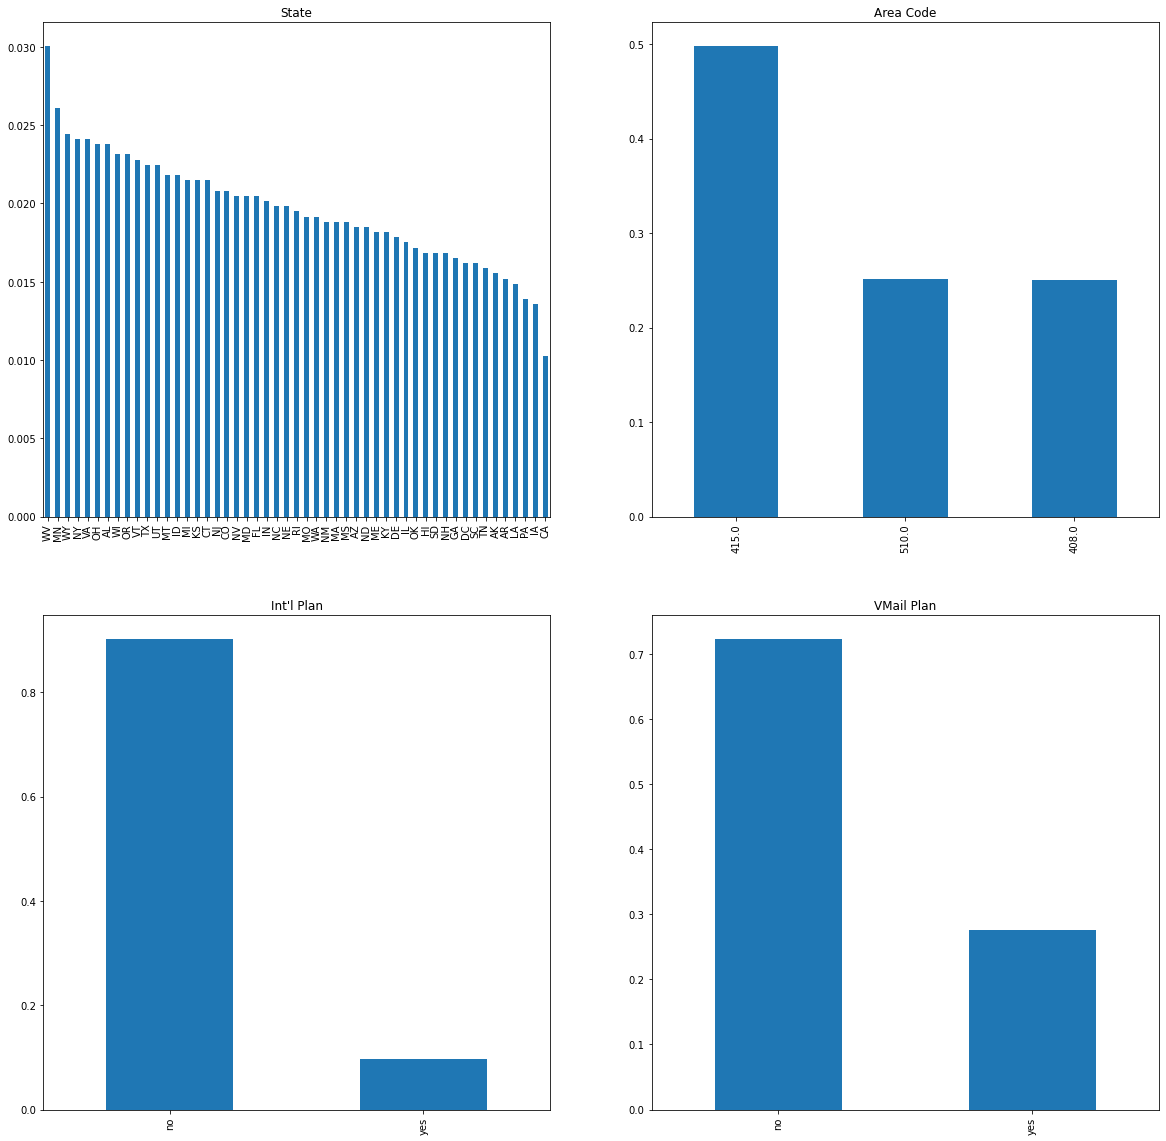

In [15]:
plt.figure(1)
plt.subplot(221)
train['State'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='State')

plt.subplot(222)
train['Area Code'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Area Code')

plt.subplot(223)
train["Int'l Plan"].value_counts(normalize=True).plot.bar(figsize=(20,20),title="Int'l Plan")

plt.subplot(224)
train['VMail Plan'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='VMail Plan')

plt.show()

It can be inferred from the above bar plots that:

- 'WV' state has highest no. of people who are using this service
- Maximum no. of people are from area code : 415.0
- Around 85% of people don't have International Plan
- Around 72% of people don't have Vmail plan

**Numerical Variables**

Till now we have seen the categorical variables and now lets visualize the numerical variables. 

**i) Account length**

C:\Users\Ankita\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


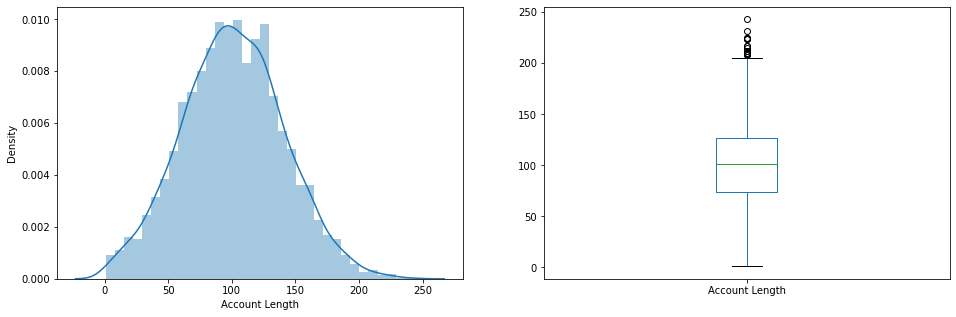

In [16]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['Account Length'])

plt.subplot(122)
train['Account Length'].plot.box(figsize=(16,5))

plt.show()

**Observations:**
    
- Data in the distribution if Normally distributed.
- Boxplot confirms the presence of outliers. Some people are truly dedicated to this telecommunication service.

Lets check whether the presence of outliers in Account length is driven by area code.

Text(0.5, 0.98, '')

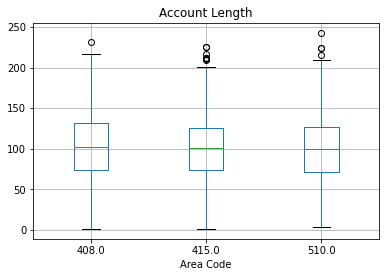

In [17]:
train.boxplot(column='Account Length', by='Area Code')
plt.suptitle("")

We can observe that loyalty of customer has nothing to do with the Area code as each of them have some outliers, which is good thing for the organization.

**ii) VMail Message**

C:\Users\Ankita\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


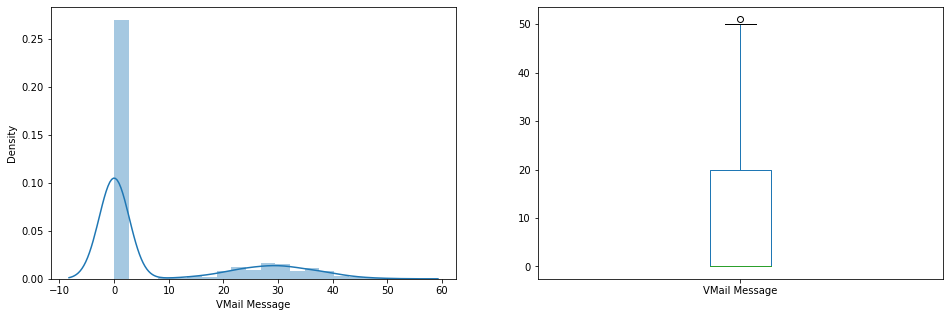

In [18]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['VMail Message'])

plt.subplot(122)
train['VMail Message'].plot.box(figsize=(16,5))

plt.show()

By looking at the distribution very many people don't get Vmail messages and those who get appears to follow normal distribution .Very few outliers can be observed.

**iii) Day Calls**

C:\Users\Ankita\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


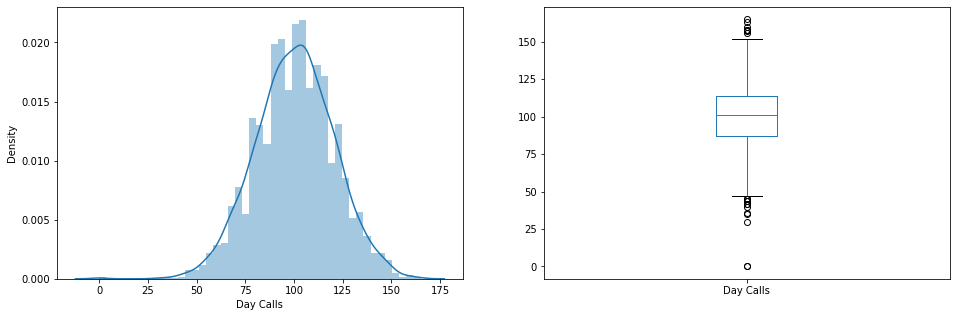

In [19]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['Day Calls'])

plt.subplot(122)
train['Day Calls'].plot.box(figsize=(16,5))

plt.show()

Observations:

- Data is normally distributed
- Mean of 100 calls are attended by a customer.
- Outliers are present such that, there are some people who receive less than 50 calls per day, and some people receive calls greater than 150.

**Bivariate Analysis**

**i) Area Code and Churn Rate**

<AxesSubplot:xlabel='Area Code'>

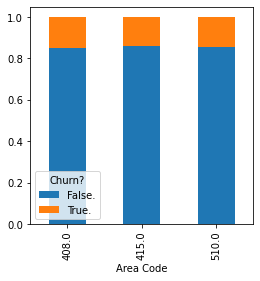

In [20]:
area = pd.crosstab(train['Area Code'],train['Churn?'])
area.div(area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(4,4))

We can observe that area code doesnt affect much to the churn rate.

**ii) State and Churn Rate**

<AxesSubplot:xlabel='State'>

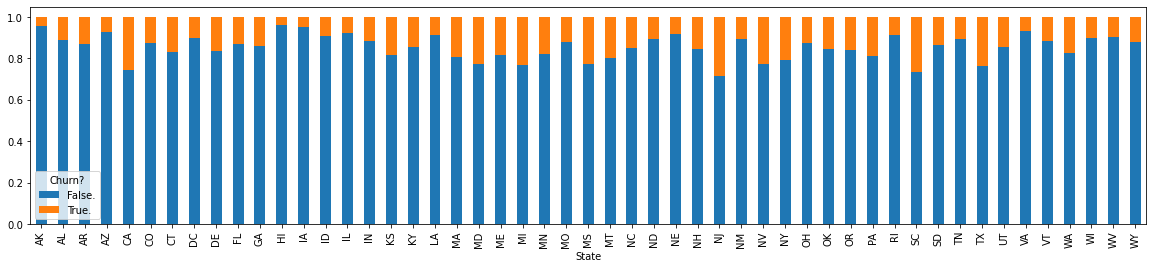

In [21]:
state = pd.crosstab(train['State'],train['Churn?'])
state.div(state.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(20,4))

We can observe that some states like 'CA', 'MD', 'NJ' have higher churning rate as compared to  the other states.

**iii) Int'l Plan and Churn Rate**

<AxesSubplot:xlabel="Int'l Plan">

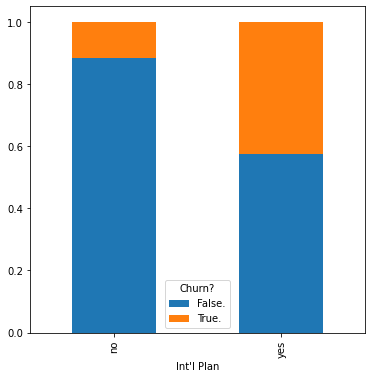

In [22]:
int_plan = pd.crosstab(train["Int'l Plan"],train['Churn?'])
int_plan.div(int_plan.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(6,6))

**Observation :**  Customers having International plans tend to churn out more, as compared to the others who have not registered for it.

**iv) VMail Plan and Churn Rate**

<AxesSubplot:xlabel='VMail Plan'>

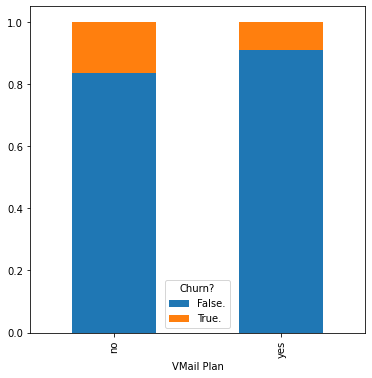

In [23]:
vmail_plan = pd.crosstab(train["VMail Plan"],train['Churn?'])
vmail_plan.div(vmail_plan.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(6,6))

**Observation:** People who don't have Vmail Plan tend to have higher churning rate. 

**Correlation Ananlysis**

<AxesSubplot:>

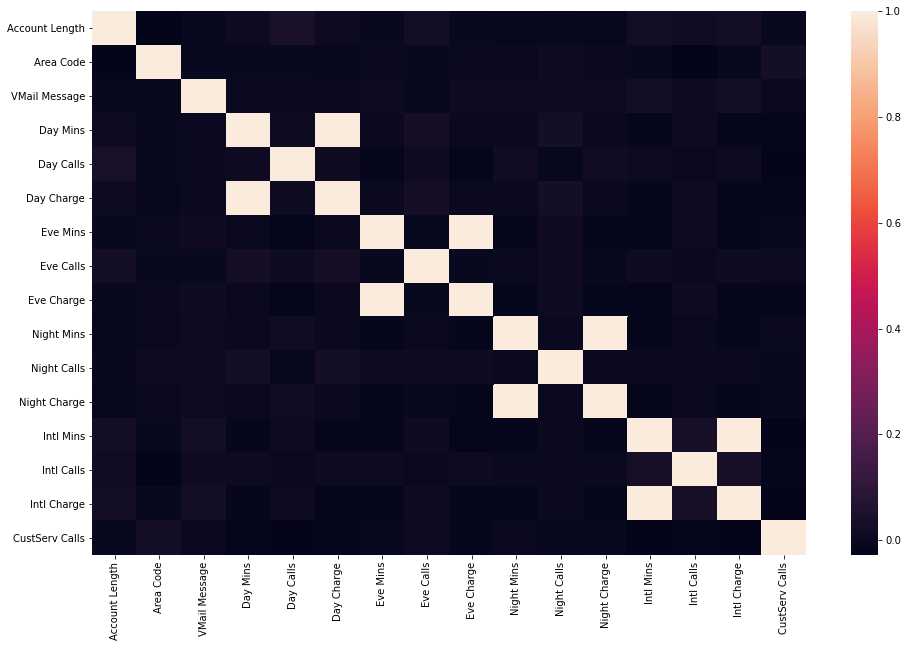

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(train.corr())